---


### Ejercicio 2 — Ojos Digitales (Filtros y Bordes con OpenCV)


**Meta:** Entender el flujo básico de percepción: escala de grises, filtros y bordes.


**Entorno:** Python (Colab/Jupyter).
**Tareas:** convertir a gris, **blur/sharpen**, **Sobel X/Y**, **Laplaciano**, comparación visual; **bonus:** sliders (`cv2.createTrackbar`) y webcam en vivo.


**Evidencia:** Collage con resultados y breve análisis de diferencias entre métodos.


---



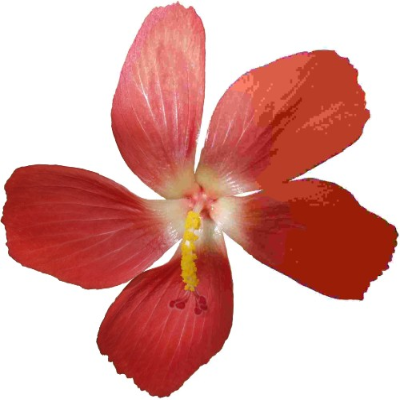

Imagen original


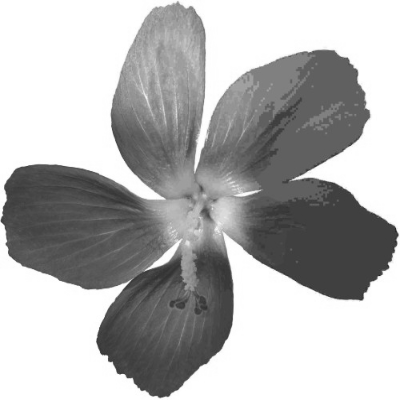

Escala de grises


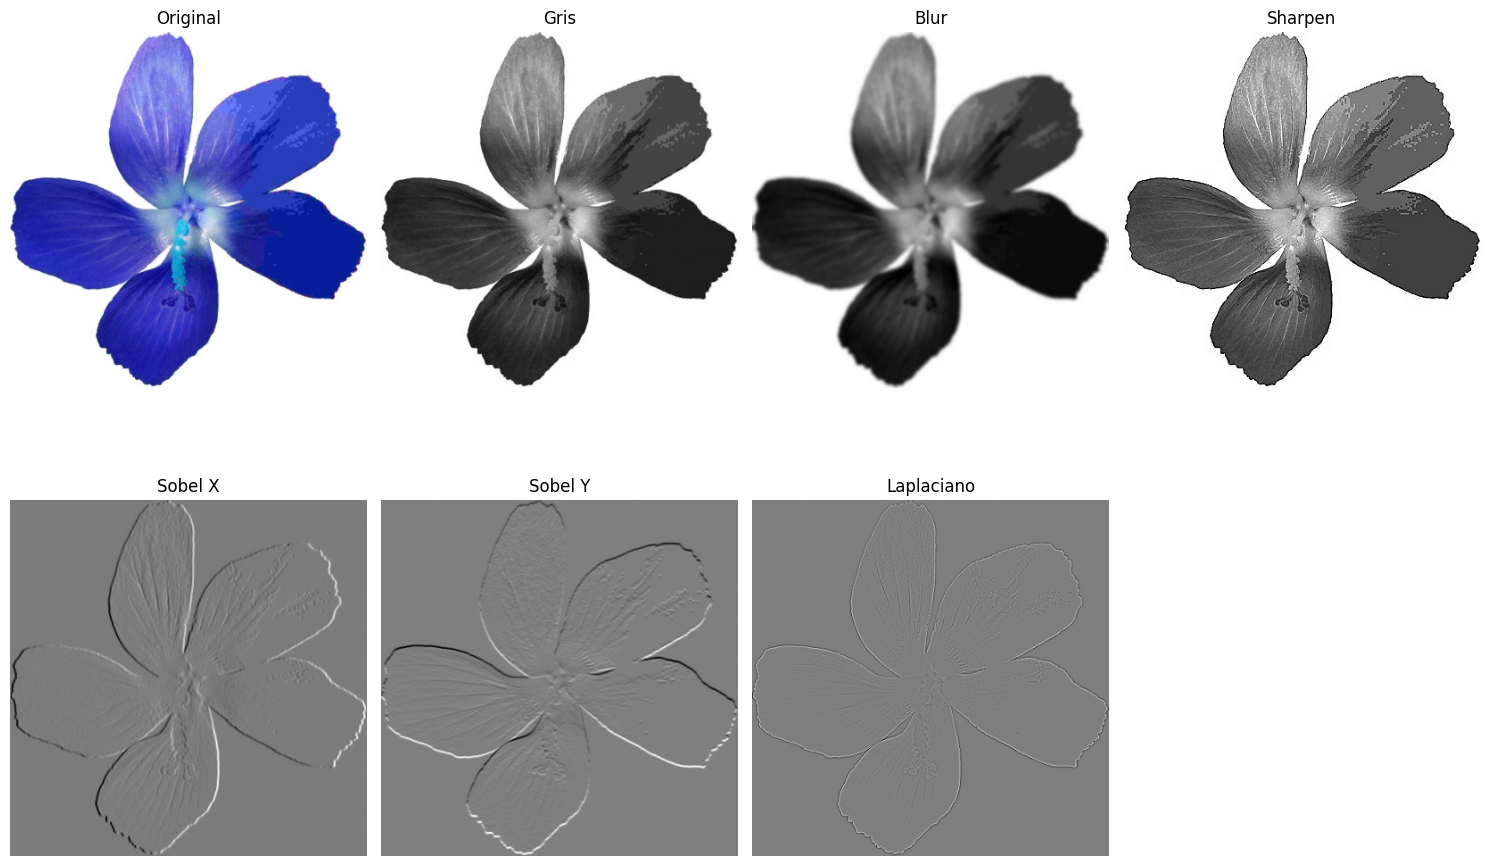

In [ ]:
# ============================================
# EJERCICIO 2 — OJOS DIGITALES
# Filtros y Bordes con OpenCV
# ============================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # para mostrar imágenes en Colab

# --- 1. Cargar imagen (puedes reemplazar la URL por otra) ---
url = "https://upload.wikimedia.org/wikipedia/commons/3/3f/JPEG_example_flower.jpg"
!wget -q {url} -O original.jpg

img = cv2.imread("original.jpg")
img = cv2.resize(img, (400, 400))  # ajustar tamaño
cv2_imshow(img)
print("Imagen original")

# --- 2. Convertir a escala de grises ---
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
print("Escala de grises")

# --- 3. Filtros: Blur y Sharpen ---
blur = cv2.GaussianBlur(gray, (9, 9), 0)

# Filtro de enfoque (sharpen)
kernel_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
sharpen = cv2.filter2D(gray, -1, kernel_sharpen)

# --- 4. Detectores de Bordes ---
# Sobel X y Y
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Laplaciano
laplacian = cv2.Laplacian(gray, cv2.CV_64F)

# --- 5. Mostrar resultados en collage ---
titles = ['Original', 'Gris', 'Blur', 'Sharpen', 'Sobel X', 'Sobel Y', 'Laplaciano']
images = [img, gray, blur, sharpen, sobelx, sobely, laplacian]

plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


# Análisis de los Métodos de Detección de Bordes

En este ejercicio se compararon diferentes técnicas de procesamiento de imágenes utilizando **OpenCV**.  
A partir de una imagen en color, se aplicaron transformaciones de *escala de grises*, filtrado y detección de bordes.

- **Escala de grises:** convierte la imagen RGB en una sola capa de intensidad luminosa, simplificando la información visual.  
- **Filtro Blur (Gaussiano):** reduce el ruido y suaviza los bordes.  
- **Filtro Sharpen:** resalta contornos y detalles mediante el realce de diferencias de intensidad.  
- **Sobel X / Sobel Y:** detectan gradientes horizontales y verticales, identificando la orientación de los bordes.  
- **Laplaciano:** detecta bordes en todas direcciones pero es más sensible al ruido.

**Conclusión:**  
El filtro *Sobel* es ideal para detectar bordes orientados, mientras que el *Laplaciano* ofrece una visión más global.  
Los filtros *Blur* y *Sharpen* son complementarios: el primero suaviza y el segundo refuerza la estructura.
